In [1]:
# Ryan Susilo

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import seaborn as sns

In [3]:
yld = web.DataReader(['DGS10', 'DGS1'], 'fred', start = '1970')

yld.head()

,DGS10,DGS1
DATE,,
1970-01-01,NaN,NaN
1970-01-02,7.86,8.28
1970-01-05,7.88,8.21
1970-01-06,7.96,8.22
1970-01-07,7.99,8.23


In [4]:
yld = yld.rename(columns = {'DGS10': '10yr', 'DGS1': '1yr'})
yld['Spread'] = yld['10yr'] - yld['1yr']
yld.tail()

,10yr,1yr,Spread
DATE,,,
2022-04-08,2.72,1.81,0.91
2022-04-11,2.79,1.85,0.94
2022-04-12,2.72,1.77,0.95
2022-04-13,2.70,1.78,0.92
2022-04-14,2.83,1.84,0.99


In [5]:
cycle = pd.read_excel('business cycle dates.xlsx', header = 3)
cycle = cycle.drop('Unnamed: 0', axis = 1)
cycle = cycle.drop('Unnamed: 1', axis = 1)

cycle = cycle.rename(columns = {'Unnamed: 2': 'Start', 'December 1854 (1854Q4)': 'End'})

cycle.head()

,Start,End,Unnamed: 4,660,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,June 1857 (1857Q2),December 1858 (1858Q4),690.0,708.0,18.0,30.0,48.0,NaN
1,October 1860 (1860Q3),June 1861 (1861Q3),730.0,738.0,8.0,22.0,30.0,40.0
2,April 1865 (1865Q1),December 1867 (1868Q1),784.0,816.0,32.0,46.0,78.0,54.0
3,June 1869 (1869Q2),December 1870 (1870Q4),834.0,852.0,18.0,18.0,36.0,50.0
4,October 1873 (1873Q3),March 1879 (1879Q1),886.0,951.0,65.0,34.0,99.0,52.0


In [6]:
# Convert recession start dates to datatime from 1970 onwards

from datetime import datetime

start1 = []
start2 = []

for x in cycle['Start']:
    if type(x)  == str:
        start1.append(x[:-9])       

start1 = start1[:-5]

for x in start1:
    start2.append(datetime.strptime(x, '%B %Y'))

start2 = start2[-7:]
start2

[datetime.datetime(1973, 11, 1, 0, 0),
 datetime.datetime(1980, 1, 1, 0, 0),
 datetime.datetime(1981, 7, 1, 0, 0),
 datetime.datetime(1990, 7, 1, 0, 0),
 datetime.datetime(2001, 3, 1, 0, 0),
 datetime.datetime(2007, 12, 1, 0, 0),
 datetime.datetime(2020, 2, 1, 0, 0)]

In [7]:
# Convert recession end dates to datatime from 1970 onwards

end1 = []
end2 = []

for x in cycle['End']:
    if type(x)  == str:
        end1.append(x[:-9])       

for x in end1:
    end2.append(datetime.strptime(x, '%B %Y'))

end2 = end2[-7:]
end2

[datetime.datetime(1975, 3, 1, 0, 0),
 datetime.datetime(1980, 7, 1, 0, 0),
 datetime.datetime(1982, 11, 1, 0, 0),
 datetime.datetime(1991, 3, 1, 0, 0),
 datetime.datetime(2001, 11, 1, 0, 0),
 datetime.datetime(2009, 6, 1, 0, 0),
 datetime.datetime(2020, 4, 1, 0, 0)]

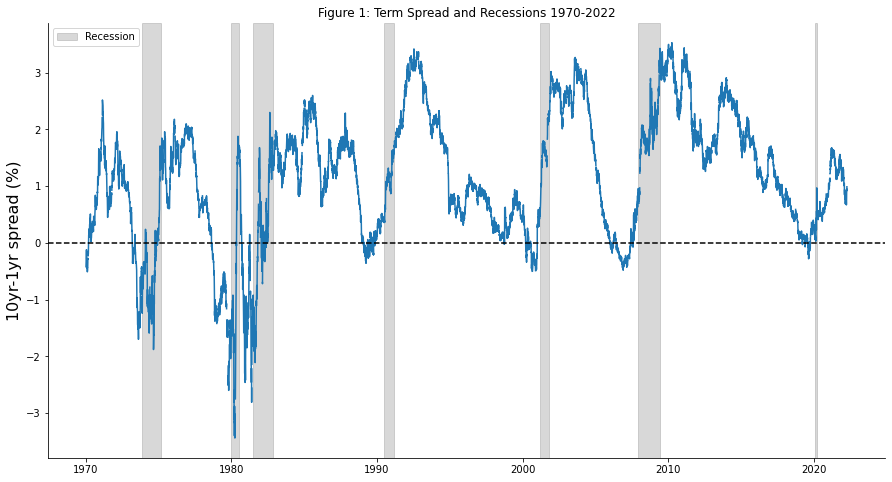

In [8]:
from matplotlib.dates import date2num

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(yld.index, yld['Spread'])

# (04/15/22) Retrieved from https://datavizpyr.com/highlight-a-time-range-in-time-series-plot-in-python-with-matplotlib/
ax.axvspan(date2num(start2[0]), date2num(end2[0]), color="grey", label = 'Recession', alpha = 0.3) 

for x in range(len(start2)):
    if x > 0:
        ax.axvspan(date2num(start2[x]), date2num(end2[x]), color="grey", alpha = 0.3) 

plt.axhline(y = 0, color = 'black', linestyle = '--')
ax.set_ylabel('10yr-1yr spread (%)', fontsize = 16)
ax.set_title('Figure 1: Term Spread and Recessions 1970-2022')
ax.legend()

sns.despine()

plt.savefig('figure1.svg')
plt.show()

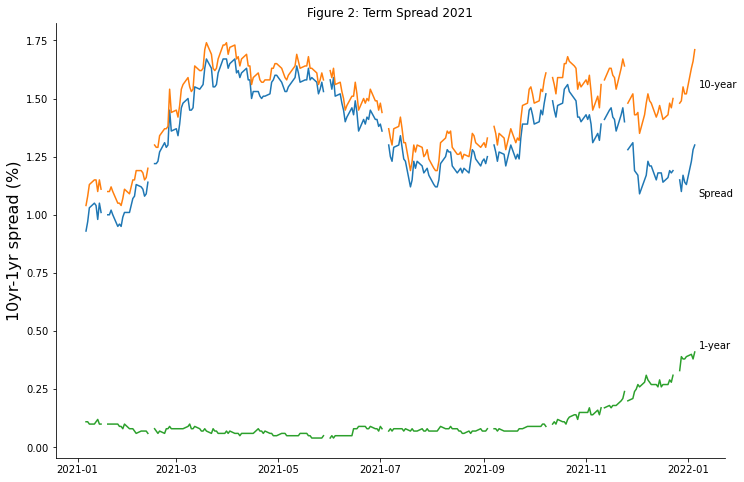

In [9]:
# How has the term spread evolved in the last year?

lst_yr = yld[-332: -71]       # Extracts data from the start of 2021 to the start of 2022

fig, ax = plt.subplots(figsize=(12,8))

ax.plot(lst_yr.index, lst_yr['Spread'])
ax.plot(lst_yr.index, lst_yr['10yr'])
ax.plot(lst_yr.index, lst_yr['1yr'])

ax.text(0.96, 0.85, '10-year', transform=ax.transAxes)
ax.text(0.96, 0.60, 'Spread', transform=ax.transAxes)
ax.text(0.96, 0.25, '1-year', transform=ax.transAxes)

ax.set_ylabel('10yr-1yr spread (%)', fontsize = 16)
ax.set_title('Figure 2: Term Spread 2021')

sns.despine()

plt.savefig('figure2.svg')
plt.show()